In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import join
from desitarget.targets import desi_mask
from collections import Counter
from astropy.table import Table

In [4]:
truth_file = "/home/forero/Data/desitest/mtl/truth.fits"
sky_file = "/home/forero/Data/desitest/mtl/sky.fits"
star_file =  "/home/forero/Data/desitest/mtl/stdstars.fits"

truth = Table.read(truth_file)
sky = Table.read(sky_file)
star = Table.read(star_file)
true_types = list(set(truth['TRUETYPE']))
print truth.colnames
print true_types

['TARGETID', 'BRICKNAME', 'RA', 'DEC', 'TRUEZ', 'TRUETYPE', 'CATEGORY']
['STAR', 'QSO', 'GALAXY', 'UNKNOWN']


In [5]:
def print_stats_total(truth, base_path="./", n_epoch=6):
    print("TOTAL EFFICIENCIES")
    print("==================")
    epoch = 0
    mtl_file = base_path+"{}/mtl.fits".format(epoch)
    mtl = Table.read(mtl_file)    
    tmp_init = join(mtl, truth, keys='TARGETID')
    
    for epoch in range(n_epoch):
        print('Epoch {}'.format(epoch))
        zcat_file = base_path+"{}/zcat.fits".format(epoch)
        zcat = Table.read(zcat_file) 
        
        total = join(zcat, tmp_init, keys='TARGETID')

        # print total.colnames
        true_types = ['LRG', 'ELG', 'QSO']
        zcat_types = ['GALAXY', 'GALAXY', 'QSO']
    
        for true_type, zcat_type in zip(true_types, zcat_types):
            i_initial = ((tmp_init['DESI_TARGET'] & desi_mask.mask(true_type)) != 0) & (tmp_init['TRUETYPE'] == zcat_type)
            i_final = ((total['DESI_TARGET'] & desi_mask.mask(true_type)) != 0) & (total['TYPE'] == zcat_type) 
            
            n_t = 1.0*len(total['TARGETID'][i_final])
            n_i = 1.0*len(tmp_init['TARGETID'][i_initial])
            print("\t {} fraction : {}".format(true_type, n_t/n_i))
        print("\t TRUE:ZCAT\n\t {}\n".format(Counter(zip(total['DESI_TARGET'], total['TYPE']))))
        #print("\t TRUE:NUMOBS\n\t {}\n".format(Counter(zip(total['DESI_TARGET'], total['NUMOBS_MORE']))))

In [6]:
def print_stats_mtl(base_path="./", n_epoch=6):
    print("MTL EFFICIENCIES")
    print("================")
    for j in range(n_epoch):
        print('PASS {}'.format(j))
        mtl_file = base_path+"{}/mtl.fits".format(j)
        mtl = Table.read(mtl_file)
        
        ii = (mtl['DESI_TARGET'] & desi_mask.QSO) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_qso = n
        print('\t QSO f_unobs:{} - {}'.format(1.0*n/n_qso, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.ELG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_elg = n
        print('\t ELG f_unobs:{} - {}'.format(1.0*n/n_elg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.LRG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_lrg = n
        print('\t LRG f_unobs:{} - {}'.format(1.0*n/n_lrg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.SKY) != 0
        print('SKY {}'.format(Counter(mtl['NUMOBS_MORE'][ii])))

        
def print_stats_zcat(truth, base_path="./", n_epoch = 6):
    print("REDSHIFT EFFICIENCIES")
    print("=======================")

    for epoch in range(n_epoch):
        zcat_file = base_path+"{}/zcat.fits".format(epoch)
        zcat = Table.read(zcat_file)
        print('Epoch {}'.format(epoch))
        for true_type in true_types:
            ii = (zcat['TYPE'] == true_type)
            jj = (truth['TRUETYPE'] == true_type)
            n_obs  = 1.0 * len(zcat['Z'][ii])
            n_total = 1.0 * len(truth['TRUEZ'][jj])
            print("\t {} : {}".format(true_type, n_obs/n_total))

In [11]:
base_path = "/home/forero/Data/desitest/lowfat_perfect/"
print_stats_zcat(truth ,base_path=base_path, n_epoch=6)
print_stats_total(truth, base_path=base_path, n_epoch=6)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.713398715067
	 QSO : 0.713307299853
	 GALAXY : 0.137833950982
	 UNKNOWN : 0.476551738317
Epoch 1
	 STAR : 0.91987332289
	 QSO : 0.920037720338
	 GALAXY : 0.286704702007
	 UNKNOWN : 0.794362548572
Epoch 2
	 STAR : 0.966775636223
	 QSO : 0.966057741132
	 GALAXY : 0.442159132356
	 UNKNOWN : 0.924484467197
Epoch 3
	 STAR : 0.980544393743
	 QSO : 0.979791812752
	 GALAXY : 0.608946305161
	 UNKNOWN : 0.962231953782
Epoch 4
	 STAR : 0.980544393743
	 QSO : 0.979791812752
	 GALAXY : 0.777696222482
	 UNKNOWN : 0.962231953782
Epoch 5
	 STAR : 0.98505073895
	 QSO : 0.984591483908
	 GALAXY : 0.700067465799
	 UNKNOWN : 0.879212154855
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.46629373705
	 ELG fraction : 0.0972389495982
	 QSO fraction : 0.713307299853
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 228974, (1, 'GALAXY'): 135705, (4, 'QSO'): 118001, (4, 'STAR'): 62849, (1, 'UNKNOWN'): 23179})

Epoch 1
	 LRG fraction : 0.783994034959
	 ELG fraction : 0.225243719519
	 Q

In [57]:
base_path = "/home/forero/Data/desitest/lowfat_serial/"
print_stats_zcat(truth ,base_path=base_path)
print_stats_total(truth, base_path=base_path)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.555801493791
	 QSO : 0.556151316585
	 GALAXY : 0.153690492614
	 UNKNOWN : 0.502025123872
Epoch 1
	 STAR : 0.641410701719
	 QSO : 0.640925357255
	 GALAXY : 0.312227939912
	 UNKNOWN : 0.594276198113
Epoch 2
	 STAR : 0.692705850303
	 QSO : 0.693419493677
	 GALAXY : 0.407757622029
	 UNKNOWN : 0.650013363762
Epoch 3
	 STAR : 0.726690730777
	 QSO : 0.728268491428
	 GALAXY : 0.472974183465
	 UNKNOWN : 0.688459877876
Epoch 4
	 STAR : 0.726690730777
	 QSO : 0.728268491428
	 GALAXY : 0.530594511648
	 UNKNOWN : 0.688459877876
Epoch 5
	 STAR : 0.985130195918
	 QSO : 0.984567304205
	 GALAXY : 0.700053481292
	 UNKNOWN : 0.880384053948
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.486425751386
	 ELG fraction : 0.112567077013
	 QSO fraction : 0.556151316585
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 265068, (1, 'GALAXY'): 141564, (4, 'QSO'): 92003, (4, 'STAR'): 48965, (1, 'UNKNOWN'): 24418})

Epoch 1
	 LRG fraction : 0.573884389528
	 ELG fraction : 0.279889296386
	 

In [58]:
base_path = "/home/forero/Data/desitest/lowfat/"
print_stats_zcat(truth ,base_path=base_path)
print_stats_total(truth, base_path=base_path)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.713875456878
	 QSO : 0.713627680925
	 GALAXY : 0.137845289772
	 UNKNOWN : 0.475708793355
Epoch 1
	 STAR : 0.778610184113
	 QSO : 0.778713397974
	 GALAXY : 0.296597418158
	 UNKNOWN : 0.596722794465
Epoch 2
	 STAR : 0.81665872097
	 QSO : 0.817255845443
	 GALAXY : 0.396587780186
	 UNKNOWN : 0.669359978618
Epoch 3
	 STAR : 0.841188222207
	 QSO : 0.841864738738
	 GALAXY : 0.468469282274
	 UNKNOWN : 0.71411830013
Epoch 4
	 STAR : 0.841188222207
	 QSO : 0.841864738738
	 GALAXY : 0.545164100636
	 UNKNOWN : 0.71411830013
Epoch 5
	 STAR : 0.984846421031
	 QSO : 0.98439804628
	 GALAXY : 0.69995521178
	 UNKNOWN : 0.878636485125
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.465895151342
	 ELG fraction : 0.0973009517759
	 QSO fraction : 0.713627680925
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 229120, (1, 'GALAXY'): 135589, (4, 'QSO'): 118054, (4, 'STAR'): 62891, (1, 'UNKNOWN'): 23138})

Epoch 1
	 LRG fraction : 0.583244281498
	 ELG fraction : 0.261170159456
	 QSO

TOTAL EFFICIENCIES
==================
Epoch 0
	 LRG fraction : 0.465877970924
	 ELG fraction : 0.0973213360535
	 QSO fraction : 0.713041323113
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 229168, (1, 'GALAXY'): 135584, (4, 'QSO'): 117957, (4, 'STAR'): 62840, (1, 'UNKNOWN'): 23205})

Epoch 1
	 LRG fraction : 0.584350700446
	 ELG fraction : 0.261272505516
	 QSO fraction : 0.77879198201
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 615233, (1, 'GALAXY'): 170063, (4, 'QSO'): 128834, (4, 'STAR'): 68560, (1, 'UNKNOWN'): 29135})

Epoch 2
	 LRG fraction : 0.65239202966
	 ELG fraction : 0.363276704678
	 QSO fraction : 0.816971733927
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 855428, (1, 'GALAXY'): 189865, (4, 'QSO'): 135150, (4, 'STAR'): 71856, (1, 'UNKNOWN'): 32639})


In [12]:
base_path = "/home/forero/Data/desitest/lowfat_perfect/"
print_stats_zcat(truth ,base_path=base_path)
print_stats_total(truth, base_path=base_path)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.714113827783
	 QSO : 0.713234760742
	 GALAXY : 0.137843399974
	 UNKNOWN : 0.475297600691
Epoch 1
	 STAR : 0.779018819951
	 QSO : 0.778900790676
	 GALAXY : 0.296646552913
	 UNKNOWN : 0.598902115586
Epoch 2
	 STAR : 0.816216032146
	 QSO : 0.817340474406
	 GALAXY : 0.394896788666
	 UNKNOWN : 0.669442217151
Epoch 3
	 STAR : 0.840813639356
	 QSO : 0.841320695408
	 GALAXY : 0.46530198032
	 UNKNOWN : 0.71411830013
Epoch 4
	 STAR : 0.840813639356
	 QSO : 0.841320695408
	 GALAXY : 0.543328728525
	 UNKNOWN : 0.71411830013
Epoch 5
	 STAR : 0.984880474018
	 QSO : 0.984700292574
	 GALAXY : 0.70011130912
	 UNKNOWN : 0.880116778717
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.466022286439
	 ELG fraction : 0.097283115533
	 QSO fraction : 0.713234760742
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 229078, (1, 'GALAXY'): 135626, (4, 'QSO'): 117989, (4, 'STAR'): 62912, (1, 'UNKNOWN'): 23118})

Epoch 1
	 LRG fraction : 0.583910881733
	 ELG fraction : 0.261142980419
	 QSO

In [35]:
import glob
tile_files = glob.glob('/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile*.fits')
print len(tile_files)

144


In [36]:
fiberdata = Table.read(tile_files[0], hdu=1)
print fiberdata.colnames
print truth.colnames
print zcat.colnames

['FIBER', 'POSITIONER', 'NUMTARGET', 'PRIORITY', 'TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'RA', 'DEC', 'XFOCAL_DESIGN', 'YFOCAL_DESIGN']
['TARGETID', 'BRICKNAME', 'RA', 'DEC', 'TRUEZ', 'TRUETYPE', 'CATEGORY']
['TARGETID', 'BRICKNAME', 'Z', 'TYPE', 'NUMOBS', 'ZERR', 'ZWARN']


In [39]:
 fiberdata = Table.read(tile_files[6], hdu=1)

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


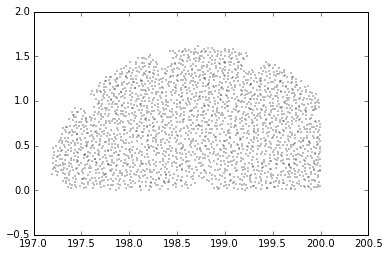

In [40]:
ii = (fiberdata['TARGETID'] >= 0)
plt.scatter(fiberdata['RA'][ii], fiberdata['DEC'][ii], s=0.1)

In [41]:
def compare_fibermaps(base_path_A="./", base_path_B="./", tile_id=0, epoch=0):
    fiber_file_A = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_A, epoch, tile_id)
    fiber_file_B = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_B, epoch, tile_id)

    fiberdata_A = Table.read(fiber_file_A, hdu=1)
    fiberdata_B = Table.read(fiber_file_B, hdu=1)

    ii_A = (fiberdata_A['TARGETID'] > 0)
    ii_B = (fiberdata_B['TARGETID'] > 0)
    intersection = list(set(fiberdata_A['TARGETID'][ii_A]) & set(fiberdata_B['TARGETID'][ii_B]))
    
    n_A = len(fiberdata_A['TARGETID'][ii_A])
    n_B = len(fiberdata_B['TARGETID'][ii_B])
    return 1.0*n_A/n_B, 1.0*len(intersection)/n_A


In [42]:
epoch  = 5
base_path_A = "/home/forero/Data/desitest/lowfat_serial/"
base_path_B = "/home/forero/Data/desitest/lowfat/"

tile_files = glob.glob('{}/{}/fiberassign/tile*.fits'.format(base_path_A, epoch))
tile_id_list = []
for tile in tile_files:
    tilename = tile.split('/')[-1]
    tile_id_list.append(int(tilename.split('.')[0].split('_')[-1]))
tile_id_list.sort()
#print tile_id_list


ratio_used = []
ratio_intersection = []
for tile_id in tile_id_list:
    used, intersec = compare_fibermaps(base_path_A=base_path_A, base_path_B=base_path_B, tile_id=tile_id, epoch=epoch)
    ratio_used.append(used)
    ratio_intersection.append(intersec)

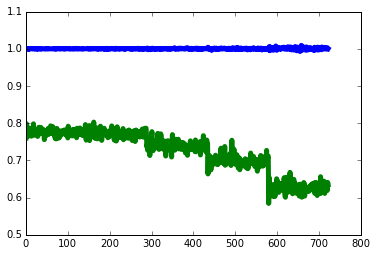

In [43]:
plt.plot(ratio_used, lw=5)
plt.plot(ratio_intersection, lw=5)